In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from ggplot import *
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

def ImportData(path):
    df = pd.read_csv(path, parse_dates=['created'], header=0, encoding="ISO-8859-1")
    return df

def SentimentIntensity(df):
    plt.rcParams['figure.figsize'] = (6.0, 6.0)
    sentiment_id = SentimentIntensityAnalyzer()

    df['polarity']=df.text.apply(lambda x:sentiment_id.polarity_scores(x)['compound'])
    df['sentiment_negative']=df.text.apply(lambda x:sentiment_id.polarity_scores(x)['neg'])
    df['sentiment_neutral']=df.text.apply(lambda x:sentiment_id.polarity_scores(x)['neu'])
    df['sentiment_positive']=df.text.apply(lambda x:sentiment_id.polarity_scores(x)['pos'])
    df['sentiment_type']=''
    df.loc[df.polarity<0,'sentiment_type']='NEGATIVE'
    df.loc[df.polarity==0,'sentiment_type']='NEUTRAL'
    df.loc[df.polarity>0,'sentiment_type']='POSITIVE'
    return df

tweets = ImportData(r'Scrapers/Twitter/data/TwitterDatafinal2.finalTweetsfin1.csv')
tweets = SentimentIntensity(tweets)

print("Summary of Tweets:")
print(tweets.sentiment_type.value_counts(sort=False))

/sharesoft/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "
/sharesoft/anaconda3/lib/python3.6/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/sharesoft/anaconda3/lib/python3.6/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/sharesoft/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  

Summary of Tweets:
NEUTRAL     42265
POSITIVE    46604
NEGATIVE    12091
Name: sentiment_type, dtype: int64


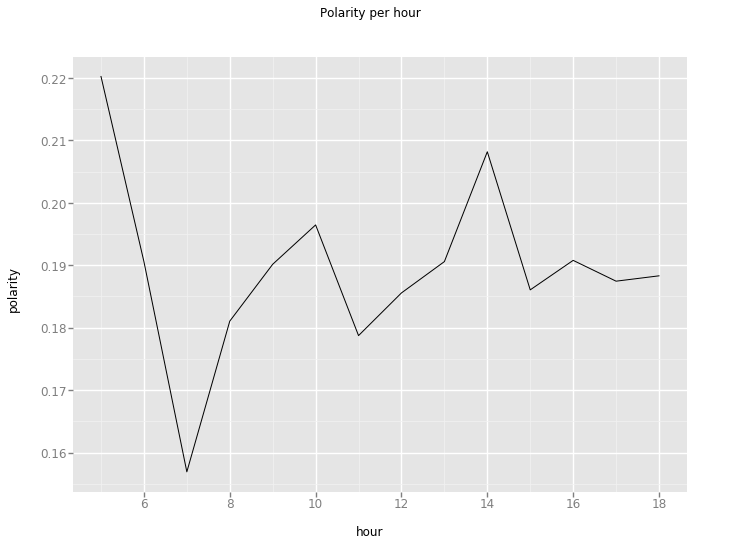

<ggplot: (8756957092630)>


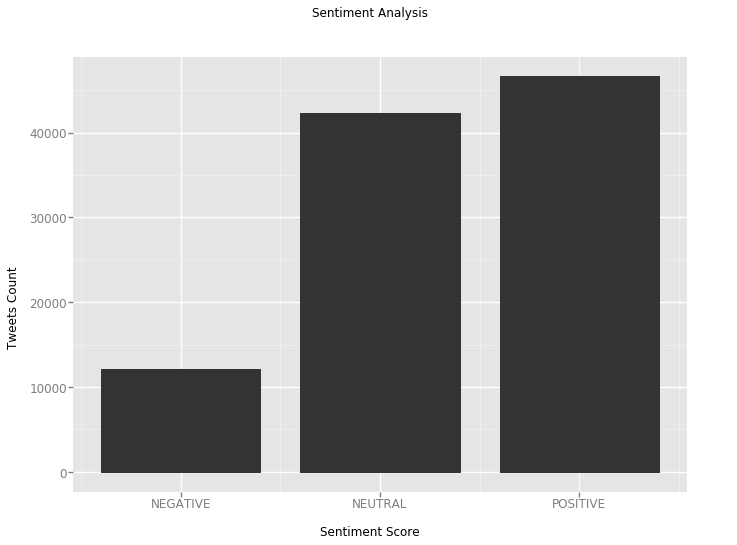

<ggplot: (8756955310747)>


In [5]:
#display(tweets.polarity)
#display(tweets.head(15))  #for testing 
#colors = ['green','blue','red']
#tweets.sentiment_type.value_counts(sort=False).plot(kind='bar', title="Sentiment Analysis", color=colors)
#plt.xlabel('Sentiment Score', fontweight='bold')
#plt.ylabel('Tweets Count', fontweight='bold')

tweets['hour'] = pd.DatetimeIndex(tweets['created']).hour
tweets['date'] = pd.DatetimeIndex(tweets['created']).date
tweets['minute'] = pd.DatetimeIndex(tweets['created']).minute

df=(tweets.groupby('hour',as_index=False).polarity.mean())
print(ggplot(aes(x='hour',y='polarity'),data=df)+geom_line()+ ggtitle("Polarity per hour"))

print(ggplot(tweets, aes(x='sentiment_type', y='sentiment_type.value_counts(sort=False)')) +\
    geom_bar() +\
    xlab("Sentiment Score") + ylab("Tweets Count") + ggtitle("Sentiment Analysis")) #+\
    #scale_fill_manual(values = color("#DD0426","#246EB9","#04B430"))

                 count  retweetCount
date       hour                     
2018-03-27 5       220             0
           6      4405             0
           7      5415             0
2018-03-28 7      1354             0
           8      5939             0
           9      2887             0
2018-03-29 9      1954             0
           10     4350             0
           11     3837             0
2018-03-30 11      934             0
           12     4114             0
           13     5210             0
           14       14             0
2018-03-31 6      1136             0
           7      3898             0
           14     4639             0
           15      828             0
2018-04-01 7      4075             0
           8      6256             0
           9      1299             0
2018-04-02 9      4883             0
           10     5465             0
2018-04-03 10     2113             0
           11     5666             0
           12     4197             0
 

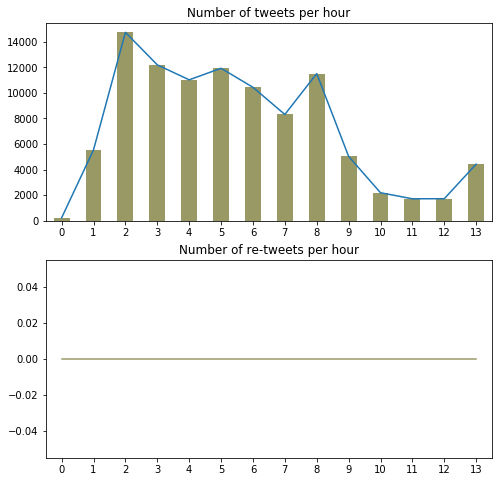

In [8]:
tweets['count'] = 1
tweets_filtered = tweets[['hour', 'date', 'count', 'retweetCount']]
tweets_filtered.head(2)

tweets_hourly = tweets_filtered.groupby(["hour"]).sum().reset_index()
tweets_hourly.head(2)

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))

ax1.title.set_text("Number of tweets per hour")
tweets_hourly["count"].plot.bar(ax=ax1, color='#999966')
tweets_hourly["count"].plot(ax=ax1)

ax2.title.set_text("Number of re-tweets per hour")
tweets_hourly["retweetCount"].plot.bar(ax=ax2)
tweets_hourly["retweetCount"].plot(ax=ax2, color='#999966')

pivot_df = tweets_filtered.pivot_table(tweets_filtered, index=["date", "hour"], aggfunc=np.sum)
print(pivot_df)

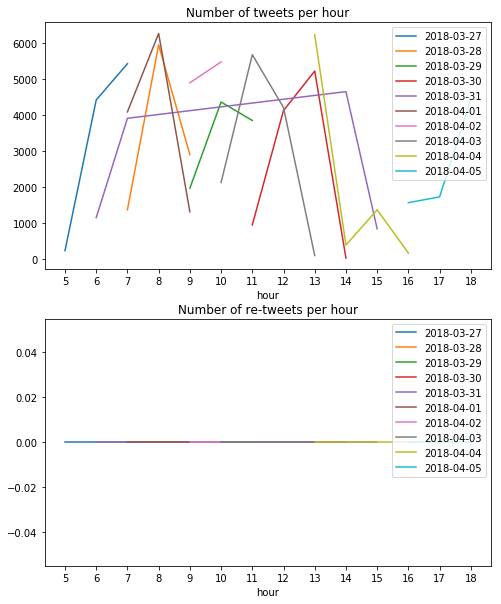

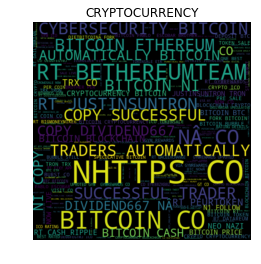

In [9]:
dates = pivot_df.index.get_level_values(0).unique()

f, ax = plt.subplots(2, 1, figsize=(8, 10))
plt.setp(ax, xticks=list(range(0,24)))

ax[0].title.set_text("Number of tweets per hour")
ax[1].title.set_text("Number of re-tweets per hour")

for date in dates:
    split = pivot_df.xs(date)
    split["count"].plot(ax=ax[0], legend=True, label='' + str(date))
    split["retweetCount"].plot(ax=ax[1], legend=True, label='' + str(date))       

def wordcloud_by_province(tweets):
    stopwords = set(STOPWORDS)
    stopwords.add("https")
    stopwords.add("00A0")
    stopwords.add("00BD")
    stopwords.add("00B8")
    stopwords.add("ed")
    wordcloud = WordCloud(background_color="black",width=480,height=480, margin=0,stopwords=stopwords,max_font_size=70, random_state =2000).generate(" ".join([i for i in tweets['text'].str.upper()]))
    plt.figure()
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.margins(x=0, y=0)
    plt.axis("off")
    plt.title("CRYPTOCURRENCY")
    
wordcloud_by_province(tweets)

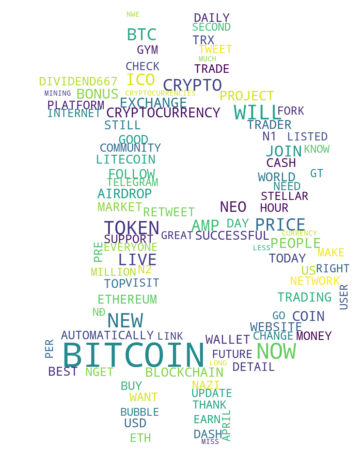

In [3]:
from PIL import Image
from os import getcwd, path
from wordcloud import ImageColorGenerator
from wordcloud import WordCloud

def GenerateWordCloud():
    bitcoin_mask = np.array(Image.open(r"source/bitcoin.png"))
    stopwords = set(STOPWORDS)
    custom_stopwords = [
        "https", "00A0", "00BD", "00B8",
        "ed", "NHTTPS", "CO", "COPY", "RATING",
        "NI", "RT", "NÂ", "ONE", "DAY", "FREE",
        "SALE", "TIME", "VIA", "SEE", "FIRST", 
    ]
    stopwords.update(custom_stopwords)

    wordcloud = WordCloud(collocations=False,
                          background_color="white",
                          width=1024, height=1024, 
                          margin=0,
                          mask=bitcoin_mask,
                          stopwords=stopwords,
                          max_words=100,
                          max_font_size=100, 
                          random_state =2000)
    clean_text = tweets['text'].str.replace('@([^\s]+)', '') \
            .str.replace('#([^\s]+)', '') \
            .str.replace('(\w+:|)\/\/[^\ ]+', '')
    wordcloud.generate(" ".join([i for i in clean_text.str.upper()]))
    
    plt.figure(figsize=(8,8))
    plt.imshow(wordcloud,interpolation='bilinear')
    plt.margins(x=0, y=0)
    plt.axis("off")
    plt.savefig(r"output/wordcloud.png")
    return wordcloud

wc = GenerateWordCloud()

In [53]:
score = pd.DataFrame(wc.words_, index = ['score'])
score = score.T
score.sort_values(by='score', ascending=False)

,score
BITCOIN,1.000000
NOW,0.309065
WILL,0.261022
NEW,0.248203
TOKEN,0.212370
PRICE,0.175967
CRYPTO,0.166610
BTC,0.164479
LIVE,0.159610
ICO,0.159534
